import區

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier
import shap


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

讀取資料

In [2]:
df = pd.read_csv("heart-attack-risk-prediction-dataset.csv")

df["Gender"] = df["Gender"].map({"Male": "Male", "Female": "Female", "1.0": "Male", "0.0": "Female"})
df["Heart Attack Risk (Text)"] = df["Heart Attack Risk (Text)"].apply(lambda x: 1 if x >= 1 else 0)

feats = df.columns[:-4].tolist()
feats += df.columns[-3:].tolist()
feats += [df.columns[-4]]
df = df[feats]

cats = [i for i in df.columns if df[i].nunique() <= 4]
nums = [i for i in df.columns if i not in cats]

for i in cats:
    df[i] = df[i].fillna(df[i].mode()[0])
for i in nums:
    df[i] = df[i].fillna(df[i].median())

le = LabelEncoder()
for i in cats:
    df[i] = le.fit_transform(df[i])

資料切分

In [ ]:
X = df.drop(["Heart Attack Risk (Binary)", "Heart Attack Risk (Binary)", "Cholesterol", "Triglycerides", "CK-MB", "Troponin"], axis=1)
features = X.columns.tolist()
for i, col in enumerate(features, 1):
    print(f"{i:>2}. {col}")

y = df["Heart Attack Risk (Binary)"]

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

['Age', 'Heart rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Blood sugar', 'Systolic blood pressure', 'Gender_1.0', 'Gender_Female', 'Gender_Male']


訓練

In [144]:
model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

🎯 Accuracy: 0.6198860693940963
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.73      1265
           1       0.42      0.28      0.34       666

    accuracy                           0.62      1931
   macro avg       0.55      0.54      0.54      1931
weighted avg       0.59      0.62      0.60      1931

🧮 Confusion Matrix:
 [[1008  257]
 [ 477  189]]


輸出SHAP

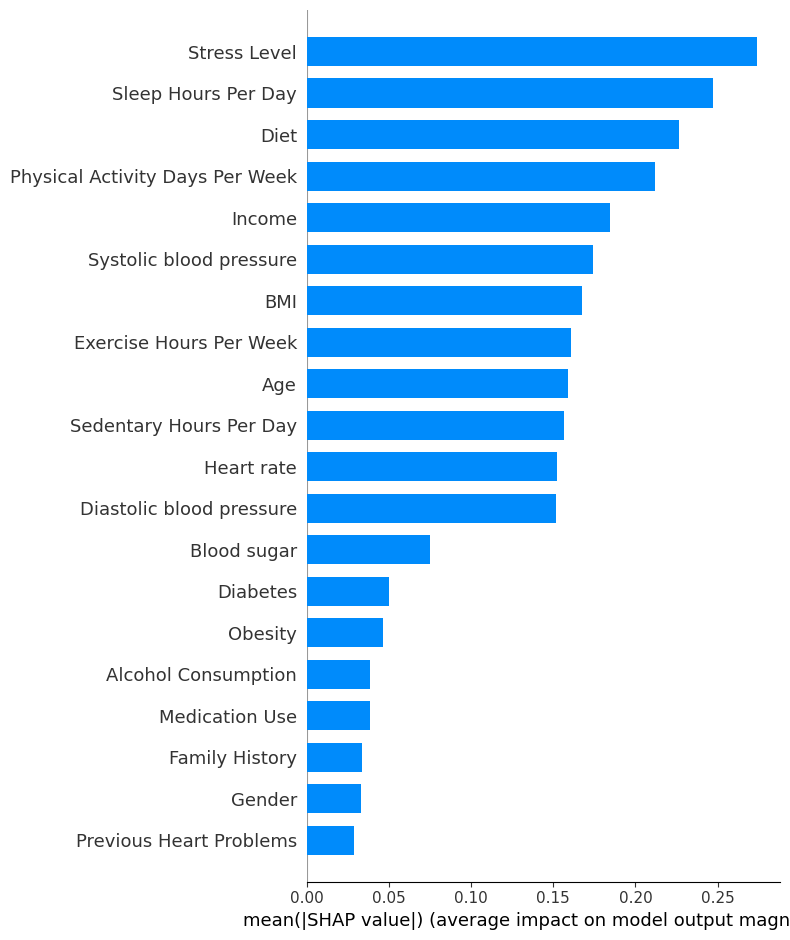

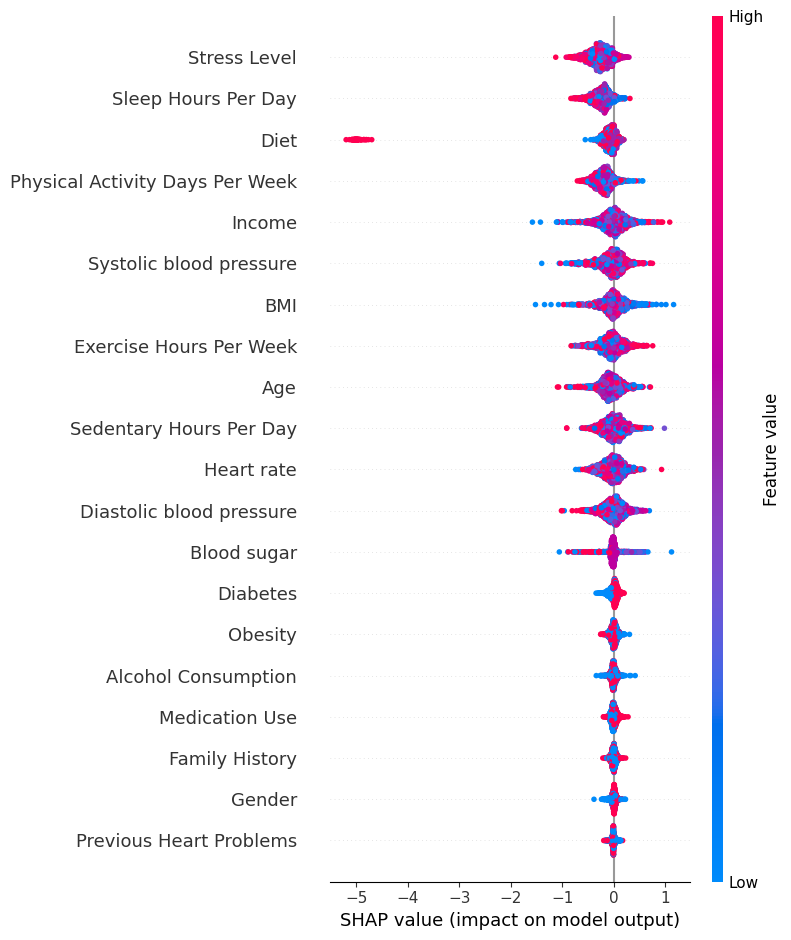

In [145]:
explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_test)

# 顯示 summary plot（重要性 + 方向）
shap.summary_plot(shap_values, x_test, plot_type="bar")
shap.summary_plot(shap_values, x_test)

輸出隨機一筆資料的SHAP

In [ ]:
import random
import shap

# 建立 explainer 並取得 shap 值（針對 class=1）
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)

# 隨機選一筆資料
random_index = random.randint(0, X_test.shape[0] - 1)

# 預測與真實標籤
print(f"第 {random_index} 筆資料預測：", rf.predict(X_test.iloc[[random_index]])[0])
print("實際標籤：", y_test.iloc[random_index])
print("特徵：")
display(X_test.iloc[random_index])

# SHAP 向量與必要欄位
shap_vec = shap_values[1][random_index]  # class=1 的 SHAP 值
base_value = explainer.expected_value[1]
feature_values = X_test.iloc[random_index]
feature_names = X_test.columns

# 包成 Explanation
explanation = shap.Explanation(
    values=shap_vec,
    base_values=base_value,
    data=feature_values,
    feature_names=feature_names
)

# 畫 bar plot
shap.plots.bar(explanation)

NameError: name 'rf' is not defined

建議輸出

In [ ]:
shap_row = shap_values[random_index]
shap_df = pd.DataFrame({
    'feature': x_test.columns,
    'shap_value': shap_row.values,
    'feature_value': x_test.iloc[random_index].values
})

top_positive = shap_df[shap_df['shap_value'] > 0].sort_values(by='shap_value', ascending=False).head(3)

print("\nKey Contributing Factors and Improvement Suggestions:")
for _, row in top_positive.iterrows():
    feature = row['feature']
    value = row['feature_value']

    if feature == 'Age':
            print("Age: Regular heart health check-ups")
    elif feature == 'Systolic blood pressure':
        print("Systolic Blood Pressure: Medical consultation recommended")

    elif feature == 'Diastolic blood pressure':
        print("Diastolic Blood Pressure: Medical consultation recommended")

    elif feature == 'Blood sugar':
        print("Blood Sugar: Control sugar intake, increase dietary fiber, regularly monitor blood sugar levels")

    elif feature == 'Stress Level':
        print("Stress Level: Practice meditation, deep breathing, ensure sufficient sleep")

    elif feature == 'BMI':
        print("BMI: Weight reduction needed through diet and exercise")

    elif feature == 'Exercise Hours Per Week':
        print("Exercise Hours Per Week: Recommend increasing to at least 150 minutes of moderate-intensity exercise")

    elif feature == 'Sleep Hours Per Day':
        print("Sleep Hours Per Day: Recommend increasing to 7-9 hours")

    elif feature == 'Smoking':
        print("Smoking: Strongly advise quitting smoking")

    elif feature == 'Alcohol Consumption':
        print("Alcohol Consumption: Limit alcohol intake")

    elif feature == 'Sedentary Hours Per Day':
        print("Sedentary Hours Per Day: Stand up and move for 2-3 minutes every hour")

    elif feature == 'Previous Heart Problems':
        print("Previous Heart Problems: Regular follow-ups and medication adherence")

    elif feature == 'Heart rate':
        print("Heart Rate: Monitor for irregularities, maintain cardiovascular fitness")

    elif feature == 'Diabetes':
        print("Diabetes: Maintain proper glucose control, follow dietary and medication plans")

    elif feature == 'Family History':
        print("Family History: Genetic risk present; prioritize preventive care and regular screening")

    elif feature == 'Obesity':
        print("Obesity: Recommend a calorie-controlled diet and regular physical activity")

    elif feature == 'Diet':
        print("Diet: Emphasize whole grains, vegetables, lean proteins; avoid processed foods")

    elif feature == 'Medication Use':
        print("Medication Use: Ensure adherence to prescribed medications and follow-up with physician")

    elif feature == 'Income':
        print("Income: Consider financial stress impact; seek affordable preventive care options")

    elif feature == 'Physical Activity Days Per Week':
        print("Physical Activity Days Per Week: Aim for at least 5 active days per week")


Key Contributing Factors and Improvement Suggestions:
Diabetes: Maintain proper glucose control, follow dietary and medication plans
Diet: Emphasize whole grains, vegetables, lean proteins; avoid processed foods
Systolic Blood Pressure: Medical consultation recommended
